# Zero Temperature Vertex Function Plots

## Imports and Declarations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from symmetric_point import p1_p2
import zero_temperature as zt

In [2]:
eps = sp.symbols('eps')

# pySecDec-Generated Plots

In [3]:
masses = 1, 2, 3

In [5]:
qq_mink_grid = np.arange(-15, 30)
p1_p2_mink_grid = [p1_p2(qq) for qq in qq_mink_grid]

In [7]:
corr_vals = np.array([zt.correlator_use_psd(*p1_p2, *masses) for p1_p2 in p1_p2_mink_grid])

In [8]:
vertex_vals = np.array([sp.expand(sp.I * val).subs('eps', 0) for val in corr_vals])
vertex_vals_re = np.array([sp.re(val) for val in vertex_vals])
vertex_vals_im = np.array([sp.im(val) for val in vertex_vals])

In [10]:
vertex_data = {
    "qq_mink_grid": qq_mink_grid,
    "vertex_vals_re": vertex_vals_re,
    "vertex_vals_im": vertex_vals_im,
}

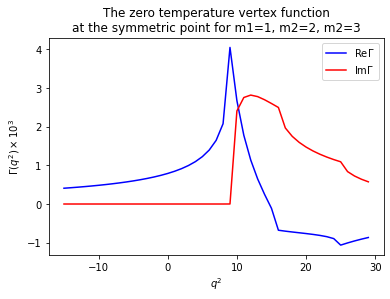

In [15]:
fig, ax = plt.subplots()
ax.plot(qq_mink_grid, 1e3 * vertex_vals_re, label=r'$\mathrm{Re}\Gamma$', color='blue')
ax.plot(qq_mink_grid, 1e3 * vertex_vals_im, label=r'$\mathrm{Im}\Gamma$', color='red')
ax.set_xlabel(r'$q^2$')
ax.set_ylabel(r'$\Gamma(q^2) \times 10^3$')
ax.set_title('The zero temperature vertex function\nat the symmetric point for m1={}, m2={}, m2={}'.format(*masses))
ax.legend(loc='upper right')

## Trapezoid Rule-Generated Plots

In [26]:
num_negative_qq = len([qq for qq in qq_mink_grid if qq <= 0])
qq_mink_grid_trimmed = qq_mink_grid[:num_negative_qq]
p1_p2_mink_grid_trimmed = p1_p2_mink_grid[:num_negative_qq]

In [23]:
k0_eucl_grid = np.arange(-10, 10, 0.5)

In [24]:
corr_vals_trap = np.array([zt.correlator_use_trapezoid(*p1_p2, *masses, k0_eucl_grid) for p1_p2 in p1_p2_mink_grid_trimmed])

In [25]:
vertex_vals_trap = np.array([sp.expand(sp.I * val).subs(eps, 0) for val in corr_vals_trap])
vertex_vals_trap_re = np.array([sp.re(val) for val in vertex_vals_trap])
vertex_vals_trap_im = np.array([sp.im(val) for val in vertex_vals_trap])

In [27]:
vertex_data_trap = {
    "qq_mink_grid_trimmed": qq_mink_grid_trimmed,
    "vertex_vals_trap_re": vertex_vals_re,
    "vertex_vals_im": vertex_vals_im,
}

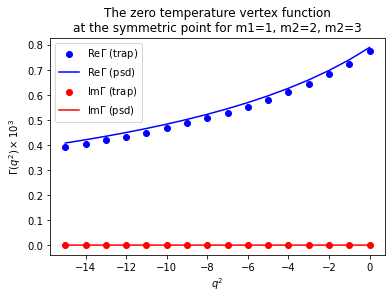

In [31]:
fig, ax = plt.subplots()
ax.scatter(qq_mink_grid_trimmed, 1e3 * vertex_vals_trap_re, label=r'$\mathrm{Re}\Gamma $ (trap)', color='blue')
ax.plot(qq_mink_grid_trimmed, 1e3 * vertex_vals_re[:num_negative_qq], label=r'$\mathrm{Re}\Gamma$ (psd)', color='blue')
ax.scatter(qq_mink_grid_trimmed, 1e3 * vertex_vals_trap_im, label=r'$\mathrm{Im}\Gamma$ (trap)', color='red')
ax.plot(qq_mink_grid_trimmed, 1e3 * vertex_vals_im[:num_negative_qq], label=r'$\mathrm{Im}\Gamma$ (psd)', color='red')
ax.set_xlabel(r'$q^2$')
ax.set_ylabel(r'$\Gamma(q^2) \times 10^3$')
ax.set_title('The zero temperature vertex function\nat the symmetric point for m1={}, m2={}, m2={}'.format(*masses))
ax.legend(loc='upper left')